In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

**Below is the table containing home prices. Here price depends on area (square feet), bed rooms and age of the home (in years). Given these prices we have to predict prices of new homes based on area, bed rooms and age.**

In [2]:
df = pd.read_csv('homepricesmultivarible.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [3]:
df.bedrooms.median()


4.0

In [4]:

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


**Individuals scatter plot graph**

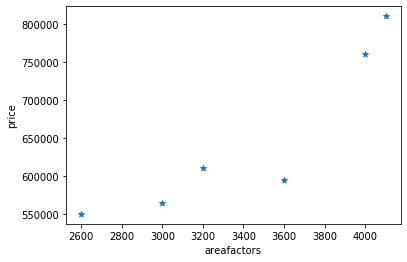

In [5]:
%matplotlib inline
plt.xlabel('areafactors')
plt.ylabel('price')
plt.scatter(df.area,df.price,marker='*')

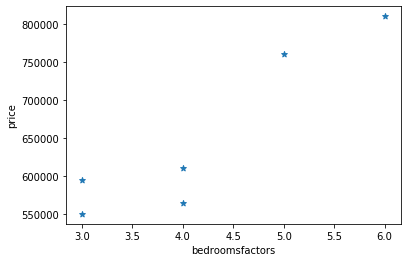

In [6]:
%matplotlib inline
plt.xlabel('bedroomsfactors')
plt.ylabel('price')
plt.scatter(df.bedrooms,df.price,marker='*')

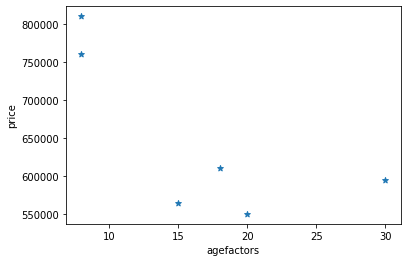

In [7]:
%matplotlib inline
plt.xlabel('agefactors')
plt.ylabel('price')
plt.scatter(df.age,df.price,marker='*')

**subplot graph for home price prediction**

Text(0, 0.5, 'price')

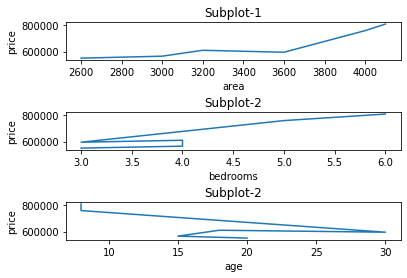

In [8]:
plt.subplot(5,1,1)
plt.plot(df.area,df.price)
plt.title('Subplot-1')
plt.xlabel('area')
plt.ylabel('price')

plt.subplot(5,1,3)
plt.plot(df.bedrooms,df.price)
plt.title('Subplot-2')
plt.xlabel('bedrooms')
plt.ylabel('price')


plt.subplot(5,1,5)
plt.plot(df.age,df.price)
plt.title('Subplot-2')
plt.xlabel('age')
plt.ylabel('price')

In [9]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
reg.coef_


array([  112.06244194, 23388.88007794, -3231.71790863])

In [11]:
reg.intercept_


221323.00186540408

**Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old**



In [12]:
reg.predict([[3000, 3, 40]])


array([498408.25158031])

In [13]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384


498408.25157402386

**Find price of home with 2500 sqr ft area, 4 bedrooms, 5 year old**

In [14]:
reg.predict([[2500, 4, 5]])


array([578876.03748933])

**In the same folder (same level as this notebook on github) there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, we need to build a machine learning model for HR department that can help them decide salaries for future candidates. 
Using this predict salaries for following candidates,
2 yr experience, 9 test score, 6 interview score
12 yr experience, 10 test score, 10 interview score**

In [15]:
df1 = pd.read_csv('hiring.csv')
df1

,experience,test_score(out of 10),interview_score(out of 10),salary_in_$
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [16]:
df1.experience = df1.experience.fillna("0")
df1

,experience,test_score(out of 10),interview_score(out of 10),salary_in_$
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [17]:
import math
median_test_score = math.floor(df1['test_score(out of 10)'].mean())
median_test_score

7

In [18]:
df1['test_score(out of 10)'] = df1['test_score(out of 10)'].fillna(median_test_score)
df1

,experience,test_score(out of 10),interview_score(out of 10),salary_in_$
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [19]:
reg = linear_model.LinearRegression()
reg.fit(df1[['experience','test_score(out of 10)','interview_score(out of 10)']],df1['salary_in_$'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**2 yr experience, 9 test score, 6 interview score**



In [20]:
reg.predict([[2,9,6]])


array([53713.86677124])

**12 yr experience, 10 test score, 10 interview score**

In [21]:
reg.predict([[12,10,10]])


array([93747.79628651])

**Generate CSV file with list of home price predictions**


In [22]:
new_df1 = pd.read_csv('hiringprediction.csv')
new_df1


,experience,test_score(out of 10),interview_score(out of 10)
0,1,9,8
1,0,7,9
2,4,6,8
3,6,9,9
4,8,10,7
5,3,10,10
6,10,8,8
7,13,7,8


In [23]:
salary= reg.predict(new_df1)
salary

array([55086.56288895, 49869.15824112, 57189.44263525, 71845.39053043,
       75616.27252732, 67447.37515132, 79165.67492455, 85711.17287003])

In [24]:
new_df1['salary_in_$']=salary
new_df1

,experience,test_score(out of 10),interview_score(out of 10),salary_in_$
0,1,9,8,55086.562889
1,0,7,9,49869.158241
2,4,6,8,57189.442635
3,6,9,9,71845.390530
4,8,10,7,75616.272527
5,3,10,10,67447.375151
6,10,8,8,79165.674925
7,13,7,8,85711.172870


**hiringpredictiondetails.csv is the CSV file with list of home price predictions**


In [25]:
new_df1.to_csv("hiringpredictiondetails.csv")
